In [1]:
import pandas as pd
from aidweather.core import AidWeather
from aidweather.dataviz import Visualizer

https://power.larc.nasa.gov/api/temporal/daily/point
['T2M', 'T2M_MAX', 'T2M_MIN', 'T2MWET', 'T2MDEW', 'TS', 'QV2M', 'RH2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT', 'ALLSKY_TOA_SW_DWN', 'WS10M', 'WS10M_MAX', 'WS50M', 'WS50M_MAX', 'WD50M', 'PS']


## Instantiate AidWeather client and Visualizer


In [2]:
aw = AidWeather("TestSite", -12.5, -49.2, "2023-01-01", "2023-12-31")
viz = Visualizer(aw)

## Load agro data

In [3]:
df_agro = pd.read_csv("../growth_gandu.csv")
df_agro

,plant_label,clone_name,block,plot,pruning,date,treatments,plant_number,height_cm,diameter_1_mm,diameter_2_mm,canopy_diameter_1_cm,canopy_diameter_2_cm,leaf_length_cm,leaf_width_cm,site
0,2_p01_01,fa_13,1,1,1,2022-03-01,1,1,50.0,9.0,8.0,42.7,33.1,14.0,5.4,gandu
1,2_p01_02,fa_13,1,1,1,2022-03-01,1,2,69.0,15.0,16.0,94.5,89.0,29.1,10.5,gandu
2,2_p01_03,fa_13,1,1,1,2022-03-01,1,3,82.0,13.5,11.0,10.0,12.5,35.6,11.5,gandu
3,2_p01_04,fa_13,1,1,1,2022-03-01,1,4,65.0,11.0,9.0,56.5,66.5,19.7,7.4,gandu
4,2_p01_05,fa_13,1,1,1,2022-03-01,1,5,51.0,7.0,3.0,38.9,33.7,15.8,6.7,gandu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,2_p31_11,sj_02,2,31,2,2024-08-27,7,11,240.0,70.6,70.4,360.0,333.0,26.0,9.5,gandu
5625,2_p31_12,sj_02,2,31,2,2024-08-27,7,12,243.0,100.5,80.6,377.0,340.0,32.6,11.0,gandu
5626,2_p31_13,sj_02,2,31,2,2024-08-27,7,13,210.0,70.1,80.1,295.0,260.0,35.1,10.6,gandu
5627,2_p31_14,sj_02,2,31,2,2024-08-27,7,14,210.0,70.5,80.2,285.0,315.0,34.6,11.5,gandu


## Plot weather data only (moving average of 7 days)

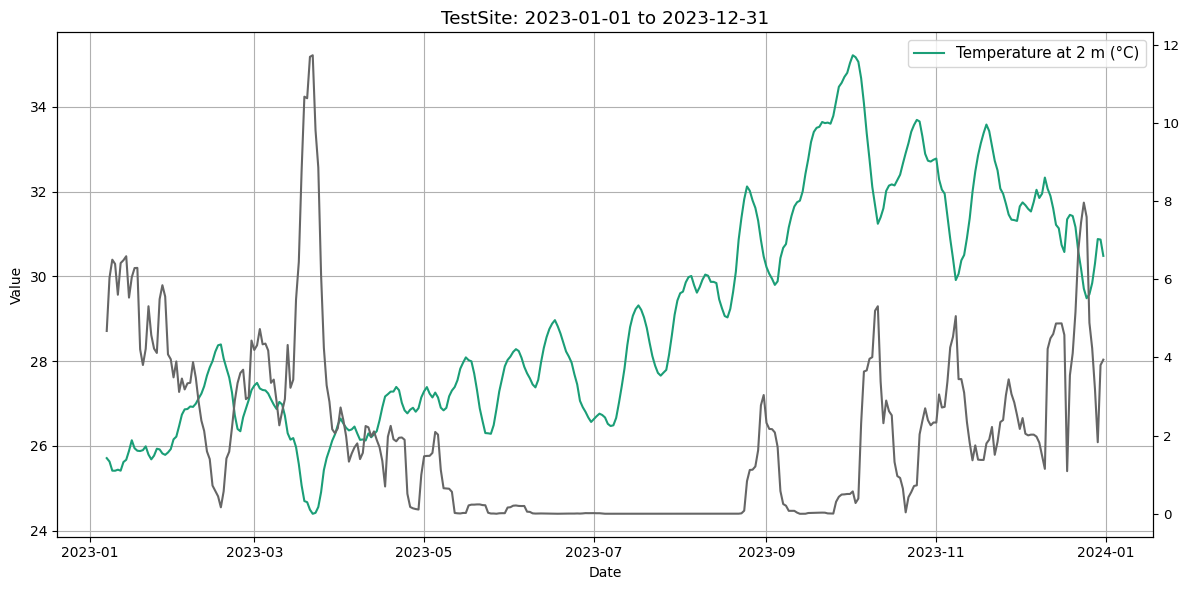

In [4]:
viz.plot(cols=["T2M", "PRECTOTCORR"], ma=7, dual=True)

## Plot agro and weather overlay

TypeError: cannot unpack non-iterable NoneType object

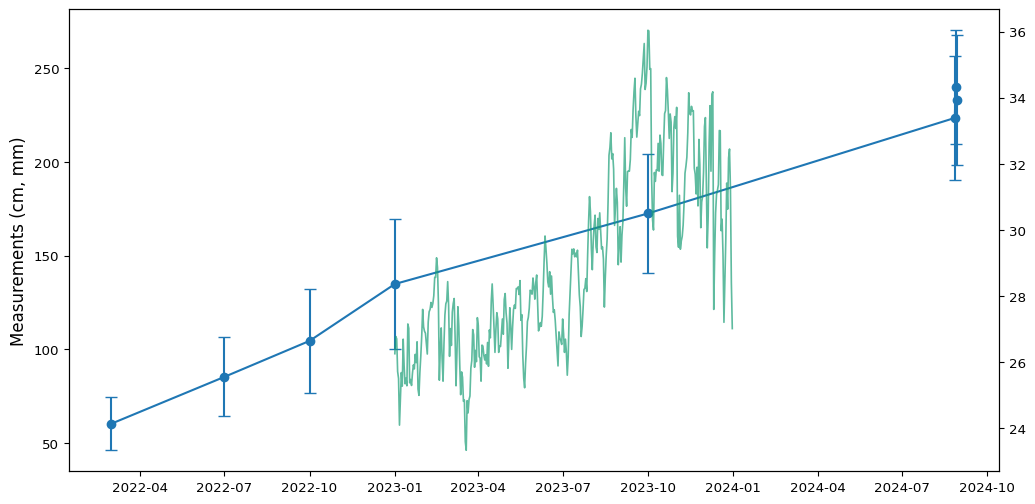

In [5]:
viz.overlay(other=df_agro, other_cols=["height_cm"], weather_cols=["T2M"])


## Plot agro and weather correlation

In [7]:
df_agro.columns

Index(['plant_label', 'clone_name', 'block', 'plot', 'pruning', 'date',
       'treatments', 'plant_number', 'height_cm', 'diameter_1_mm',
       'diameter_2_mm', 'canopy_diameter_1_cm', 'canopy_diameter_2_cm',
       'leaf_length_cm', 'leaf_width_cm', 'site'],
      dtype='object')

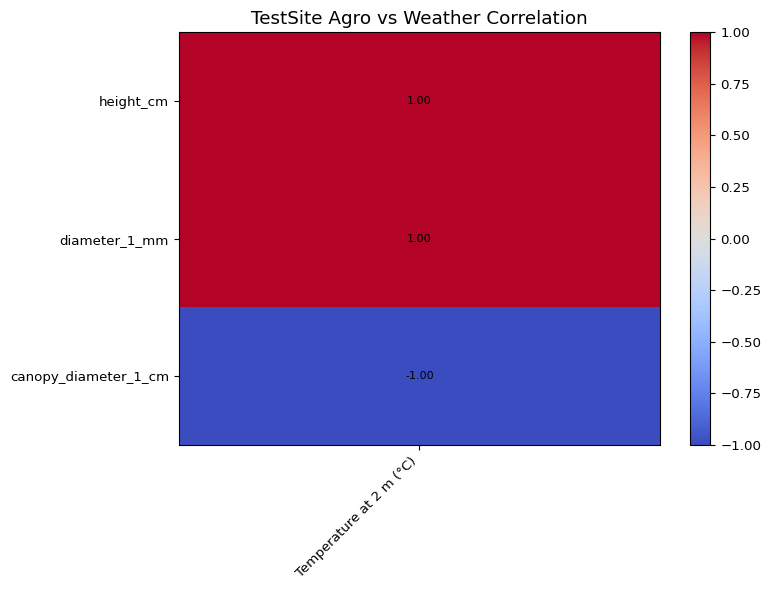

In [8]:
viz.plot_correlation(other=df_agro, other_cols=["height_cm", "diameter_1_mm", "canopy_diameter_1_cm"], weather_cols=["T2M"], freq="ME", agg="mean")